## Reading the Data

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

#reading data and printing the head to see the values
df=pd.read_csv('day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
#checking for the spread of values
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [3]:
#checking for the missing values,dtypes using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


we can see that all the columns are free from null values 

Columns Instant, dteday, casual and registered as they are not really necessary.

As Intant columns is just a row number

dteday is date which is doesn't yield aynthing in the current situation.

where as casual and registered are just split of Total columns.




In [4]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Dropping columns which are not necessary adn checking the values

bike=df.drop(columns=['instant','dteday','casual','registered','atemp'],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


In [6]:
#Changing the dtypes to category
bike.season=bike.season.astype('category')
bike.weathersit =bike.weathersit.astype('category')
bike.mnth=bike.mnth.astype('category')
bike.weekday=bike.weekday.astype('category')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [7]:
#Dropiing if any duplicate rows are present
bike.drop_duplicates(subset=None, inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 49.5 KB


In [8]:
#Creating Dummies and 
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   hum                        730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   cnt                        730 non-null    int64  
 7   season_spring              730 non-null    uint8  
 8   season_summer              730 non-null    uint8  
 9   season_winter              730 non-null    uint8  
 10  mnth_aug                   730 non-null    uint8  
 11  mnth_dec                   730 non-null    uint8  
 12  mnth_feb                   730 non-null    uint8  
 13  mnth_jan                   730 non-null    uint8  

In [9]:
print(bike.shape)
bike.head()


(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

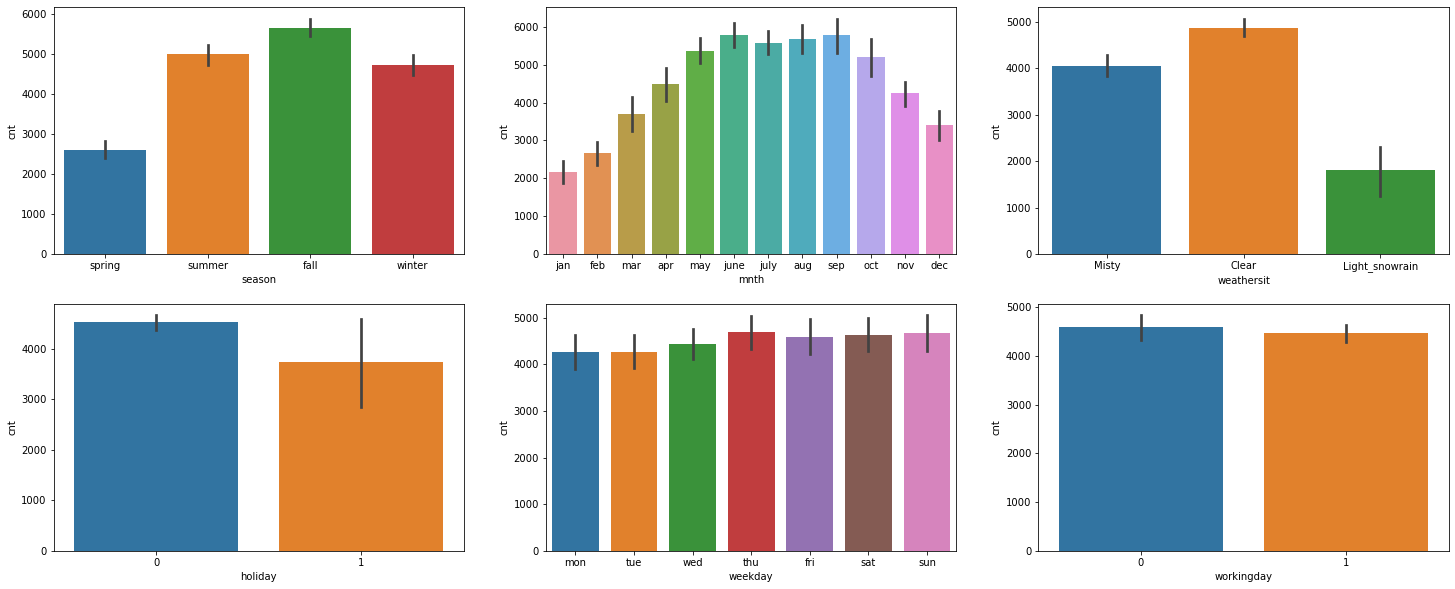

In [10]:
#Plotting Data with Count as Target variable with original data

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.barplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.barplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.barplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.barplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.barplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

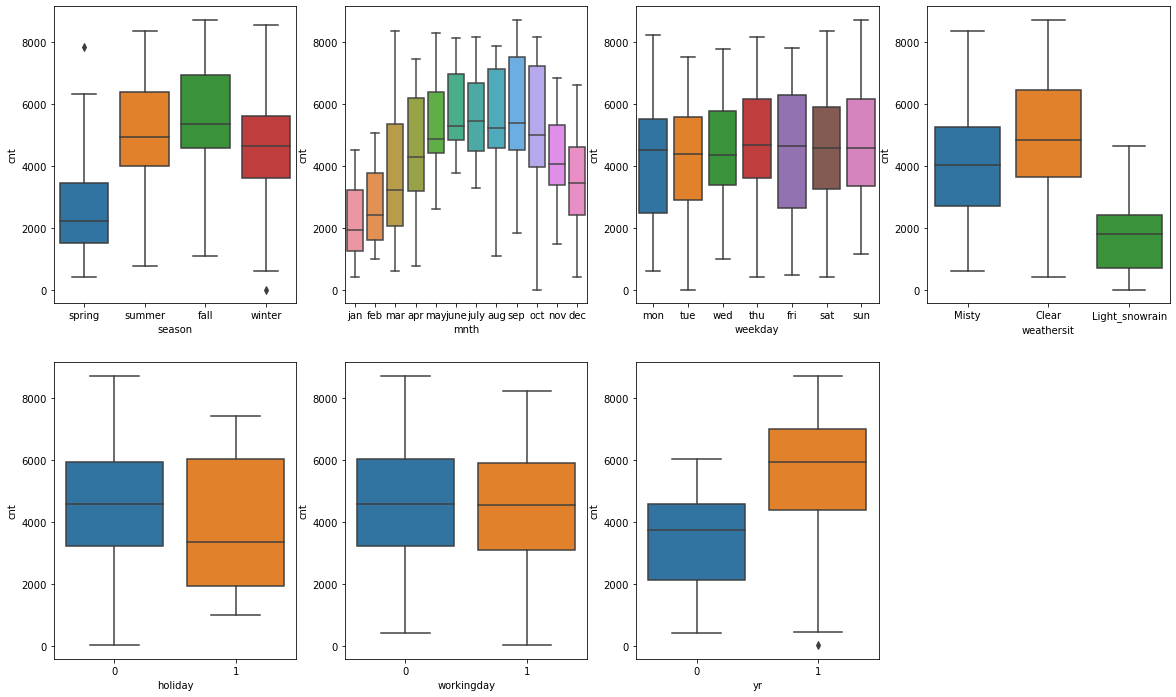

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

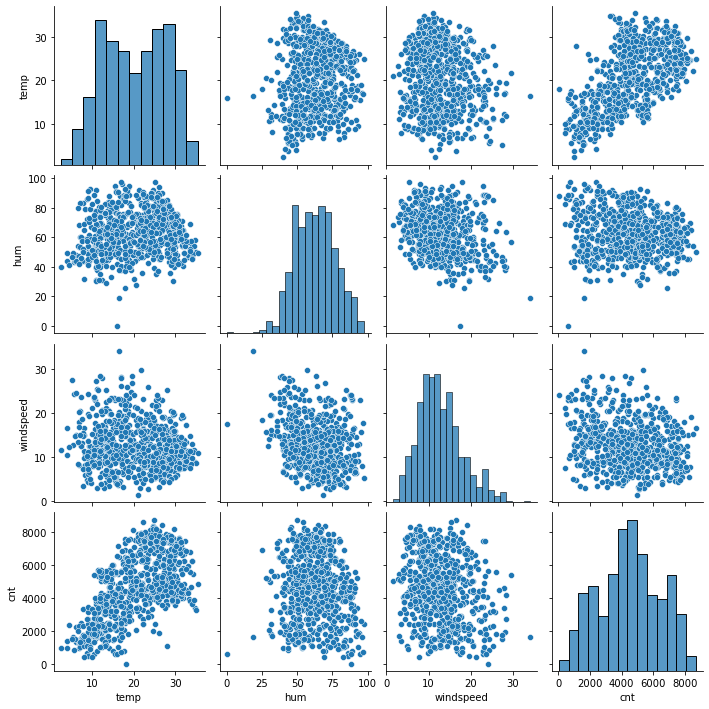

In [12]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','hum','windspeed','cnt'])
plt.show()

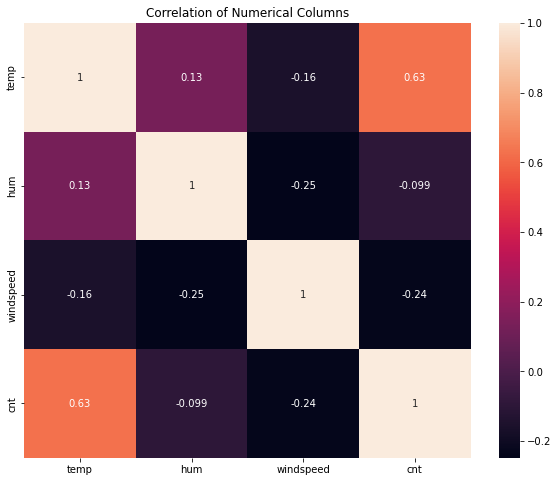

In [13]:
#correlation Matrix
plt.figure(figsize = (10,8))
cor = df[['temp','hum','windspeed','cnt']].corr()
sns.heatmap(cor, annot = True)
plt.title("Correlation of Numerical Columns")
plt.show()

## Insights

From the above plotted graphs with cnt as target variable yields below insights:

season: Season_Fall has the highest number of bookings with percentage of 32 and median of 5000. Season_Fall is followed by season_summer and season_winter with 27 and 25 percentages making season as good predictor for the target variable.

mnth: mnth_sep has highest number of bookings followed by mnth_aug and mnth_oct with medians approximately 5000.

weathersit: During weathersit1 with a median of close to 5000 with 67% of the bike booking followed by weathersit2 with 30% of total booking. weathersit can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. We can decide the importance of this variable going forward.

workingday: workingday with a median of close to 5000 booking and Almost 69% of the bike booking were happening making it a good predictor for the dependent variable.

In [14]:
#Splitting Data
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 100)

In [15]:
print(bike_train.info())
print(bike_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         510 non-null    int64  
 1   holiday                    510 non-null    int64  
 2   workingday                 510 non-null    int64  
 3   temp                       510 non-null    float64
 4   hum                        510 non-null    float64
 5   windspeed                  510 non-null    float64
 6   cnt                        510 non-null    int64  
 7   season_spring              510 non-null    uint8  
 8   season_summer              510 non-null    uint8  
 9   season_winter              510 non-null    uint8  
 10  mnth_aug                   510 non-null    uint8  
 11  mnth_dec                   510 non-null    uint8  
 12  mnth_feb                   510 non-null    uint8  
 13  mnth_jan                   510 non-null    uint8 

In [16]:
#Scaling values using Standard scaler
scaler=preprocessing.StandardScaler()
m_scale=preprocessing.MinMaxScaler()

In [17]:
num_vars = ['temp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
m_bike_train=bike_train

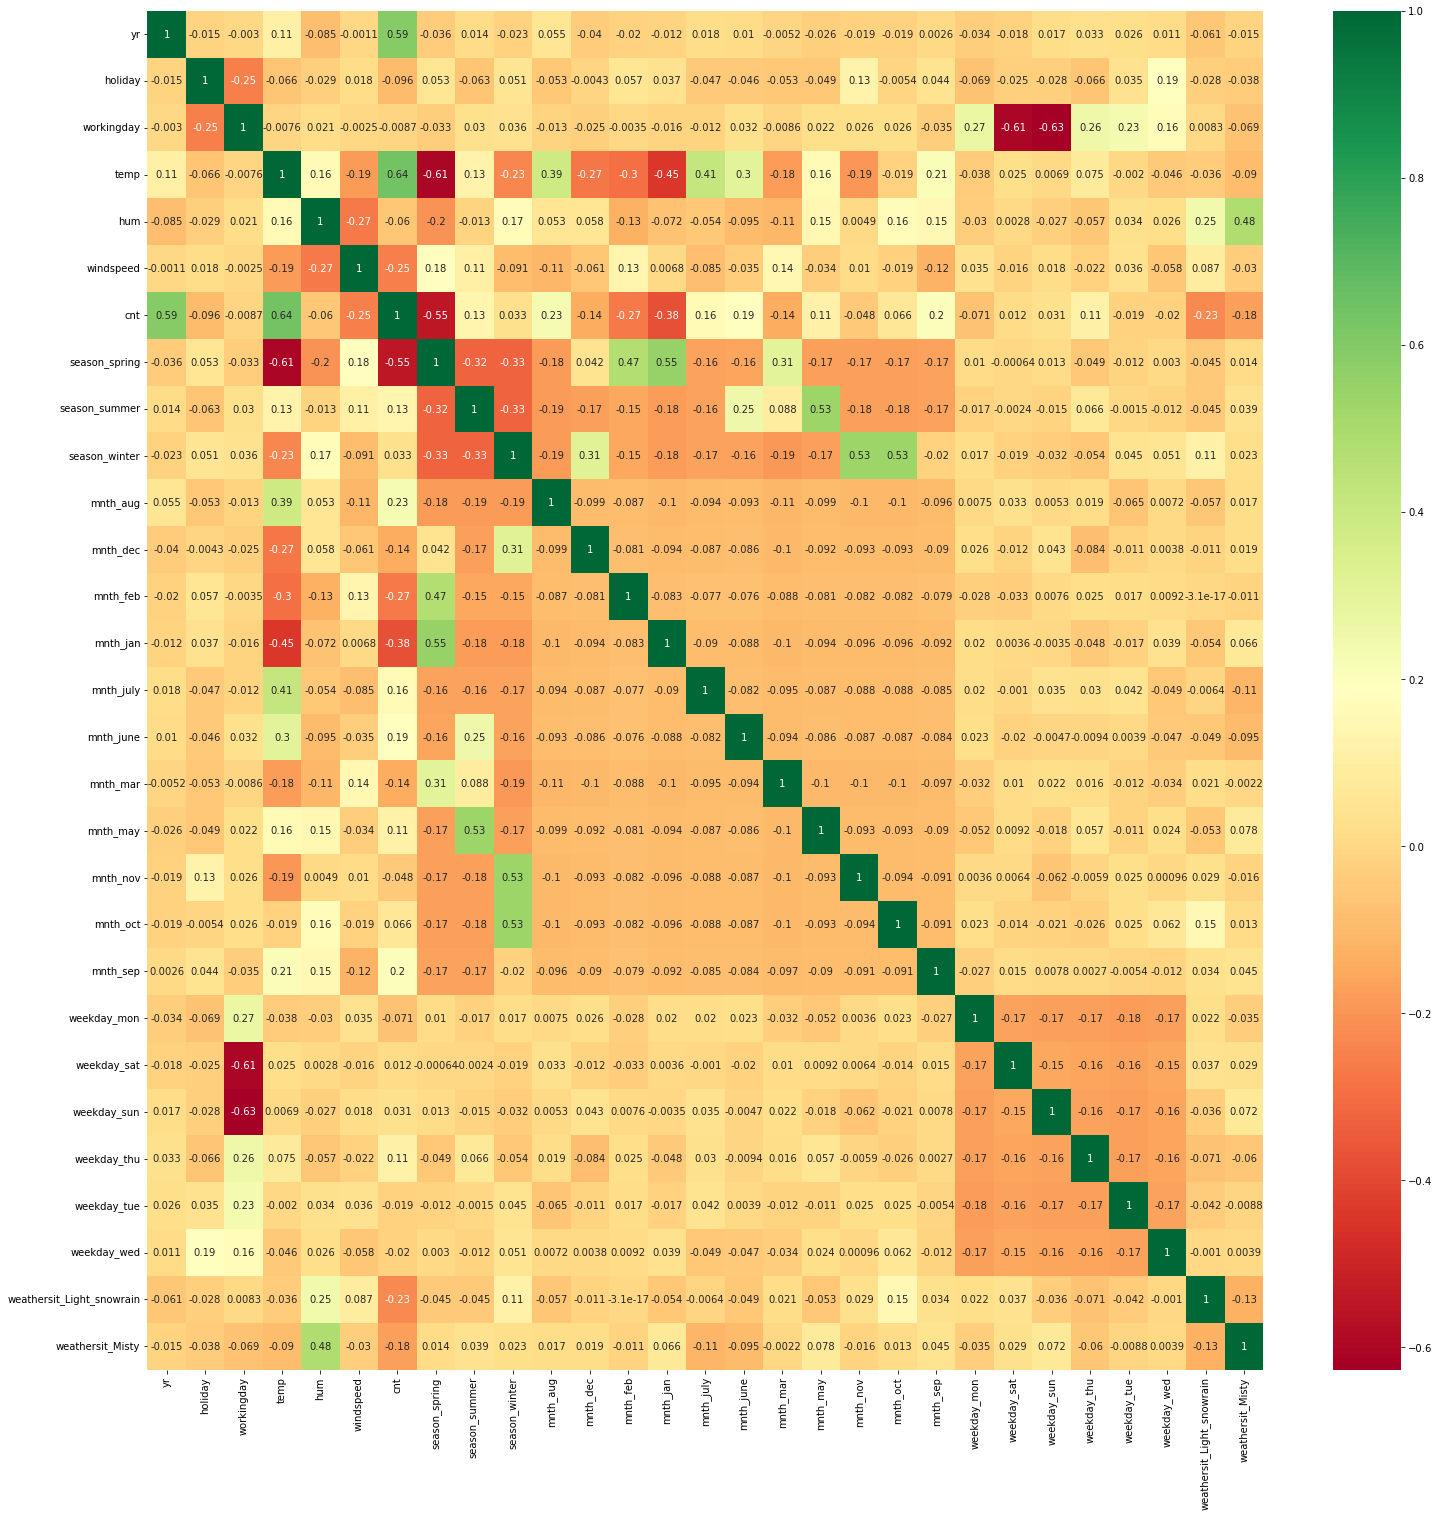

In [18]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

###  Cnt has high correlation with humidity and year. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation

In [19]:
#Buidling Linear Regression model and applying RFE

y_train = bike_train.pop('cnt')
X_train = bike_train

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [20]:
i_df=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
i_df.columns=['Columns','Support','RFE rank']

In [21]:
i_df

,Columns,Support,RFE rank
0,yr,True,1
1,holiday,True,1
2,workingday,False,2
3,temp,True,1
4,hum,False,6
5,windspeed,True,1
6,season_spring,True,1
7,season_summer,True,1
8,season_winter,True,1
9,mnth_aug,False,9


In [22]:
#Creating Function for calculating VIF

def vif(df):
    v_df = pd.DataFrame()
    v_df['Features'] = df.columns
    v_df['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    v_df['VIF'] = round(v_df['VIF'], 2)
    v_df = v_df.sort_values(by = "VIF", ascending = False)
    return v_df

In [23]:
#Checking columns which are accepted by RFE and calculating VIF

val=X_train.columns[rfe.support_]
X_train_rfe=X_train[val]
vif(X_train_rfe)

,Features,VIF
4,season_spring,3.77
2,temp,2.86
6,season_winter,2.64
9,mnth_jan,2.45
0,yr,1.96
8,mnth_feb,1.94
11,mnth_nov,1.86
7,mnth_dec,1.66
14,weathersit_Misty,1.52
10,mnth_july,1.40


## Building Statistical models

### Model1

In [24]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.55e-186
Time:                        11:19:25   Log-Likelihood:                -254.93
No. Observations:                 510   AIC:                             541.9
Df Residuals:                     494   BIC:                             609.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 2

In [25]:
#dropping mnth_feb as its p-value is greater than 0.05
X_train_new = X_train_rfe.drop(['mnth_feb'], axis = 1)
vif(X_train_new)

,Features,VIF
2,temp,2.74
4,season_spring,2.64
6,season_winter,2.63
0,yr,1.95
10,mnth_nov,1.83
8,mnth_jan,1.78
7,mnth_dec,1.54
13,weathersit_Misty,1.52
9,mnth_july,1.39
5,season_summer,1.38


In [26]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.57e-186
Time:                        11:19:25   Log-Likelihood:                -256.56
No. Observations:                 510   AIC:                             543.1
Df Residuals:                     495   BIC:                             606.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 3

In [27]:
X_train_new = X_train_new.drop(['mnth_july'], axis = 1)
vif(X_train_new)

,Features,VIF
6,season_winter,2.63
4,season_spring,2.58
2,temp,2.15
0,yr,1.95
9,mnth_nov,1.82
8,mnth_jan,1.75
7,mnth_dec,1.52
12,weathersit_Misty,1.52
5,season_summer,1.36
10,mnth_sep,1.17


In [28]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.31e-186
Time:                        11:19:25   Log-Likelihood:                -260.36
No. Observations:                 510   AIC:                             548.7
Df Residuals:                     496   BIC:                             608.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 4

In [29]:
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)
vif(X_train_new)

,Features,VIF
6,season_winter,2.63
4,season_spring,2.22
2,temp,2.02
0,yr,1.93
8,mnth_nov,1.81
11,weathersit_Misty,1.51
7,mnth_dec,1.45
5,season_summer,1.36
9,mnth_sep,1.17
3,windspeed,1.10


In [30]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.58e-185
Time:                        11:19:25   Log-Likelihood:                -264.48
No. Observations:                 510   AIC:                             555.0
Df Residuals:                     497   BIC:                             610.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 5

In [31]:
X_train_new = X_train_new.drop(['mnth_dec'], axis = 1)
vif(X_train_new)

,Features,VIF
4,season_spring,2.22
6,season_winter,2.14
2,temp,1.97
0,yr,1.92
7,mnth_nov,1.59
10,weathersit_Misty,1.50
5,season_summer,1.36
8,mnth_sep,1.16
3,windspeed,1.09
9,weathersit_Light_snowrain,1.07


In [32]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          5.90e-186
Time:                        11:19:25   Log-Likelihood:                -266.29
No. Observations:                 510   AIC:                             556.6
Df Residuals:                     498   BIC:                             607.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 6

In [33]:
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)
vif(X_train_new)

,Features,VIF
4,season_spring,2.20
2,temp,1.96
0,yr,1.92
6,season_winter,1.65
9,weathersit_Misty,1.50
5,season_summer,1.36
7,mnth_sep,1.15
3,windspeed,1.09
8,weathersit_Light_snowrain,1.07
1,holiday,1.04


In [34]:
X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          7.36e-187
Time:                        11:19:25   Log-Likelihood:                -267.01
No. Observations:                 510   AIC:                             556.0
Df Residuals:                     499   BIC:                             602.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### We can see that the p-values of all the predictors seems to be significantly low showing that multi colinearity between the predictors is very low. So we can opt for model 6

In [35]:
#checking for model 6 parameters.

lr_7.params

const                       -0.504708
yr                           1.043175
holiday                     -0.431716
temp                         0.480841
windspeed                   -0.112008
season_spring               -0.245537
season_summer                0.271811
season_winter                0.427542
mnth_sep                     0.405272
weathersit_Light_snowrain   -1.274677
weathersit_Misty            -0.357101
dtype: float64

In [36]:
#Performing Residual Analysis
y_train_pred = lr_7.predict(X_train_lm_7)

In [37]:
y_train_pred

653    0.920856
576    1.167767
426   -0.223154
728   -0.555766
482    0.238764
         ...   
526    1.042364
578    1.322980
53    -1.325170
350   -1.123602
79    -0.887060
Length: 510, dtype: float64

#### checking for distribution of errors

Text(0.5, 0, 'Errors')

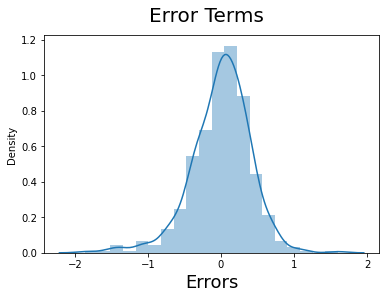

In [38]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### We can see that the error terms are following normal distribution

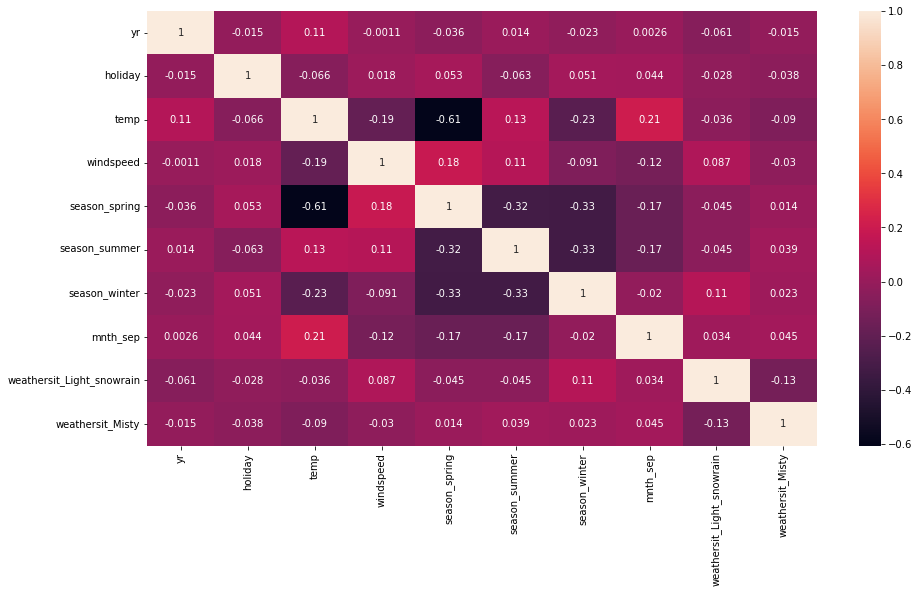

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

#### We can see that the columns are less correlated from the above heatmap


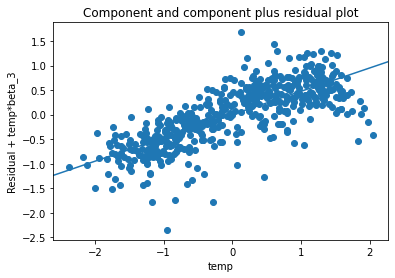

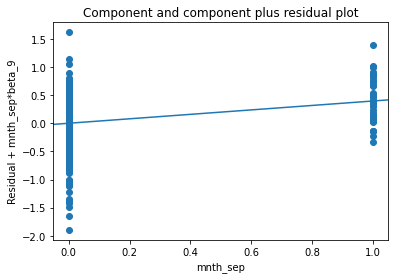

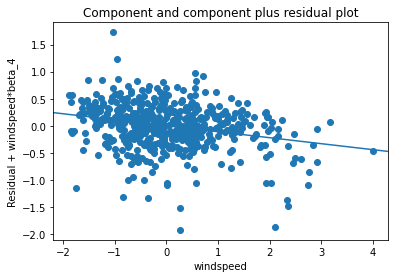

In [41]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'mnth_sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

### We can see the linearity in the spread

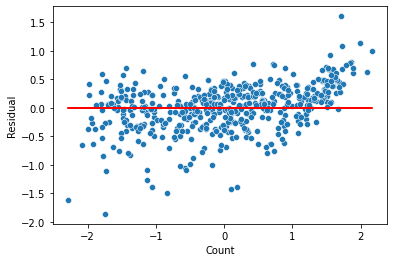

In [42]:
y_train_pred = lr_7.predict(X_train_lm_7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### we can observe that the predictors are homoscedastic from the above plot

## Making Predictions Using the Final Model

In [44]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,1.305371,0.047995,-1.394498,0.798166,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,1.613721,-0.276087,-0.984730,0.884309,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,-0.112129,1.285378,0.079219,-0.937002,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,1.526280,-1.463381,0.110839,0.150554,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,1.240938,-2.305983,1.277165,0.246953,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [48]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test)
y_pred = lr_7.predict(X_test_lm_7)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8035

Text(0, 0.5, 'y_pred')

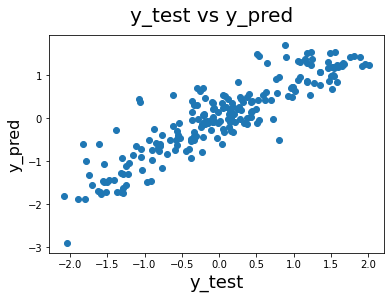

In [49]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [51]:
round(lr_7.params,4)

const                       -0.5047
yr                           1.0432
holiday                     -0.4317
temp                         0.4808
windspeed                   -0.1120
season_spring               -0.2455
season_summer                0.2718
season_winter                0.4275
mnth_sep                     0.4053
weathersit_Light_snowrain   -1.2747
weathersit_Misty            -0.3571
dtype: float64

## The best fit line for our target variable is:

 ***cnt=-0.5047 + 1.0434 x yr - 0.4317 x holiday + 0.4808 x temp -0.1120 x windspeed -0.2455 x season_Spring +0.2718 x season_summer + 0.4275 x season_winter +0.4052 x mnth_sep -1.2747 x weather_Light_snowrain - 0.3571 x weather_Misty***
 


In [52]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7941


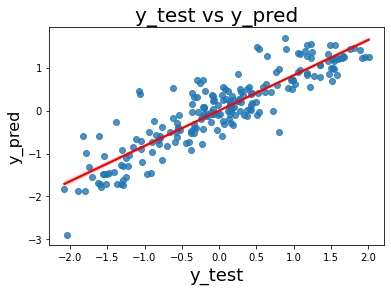

In [55]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Final R2 comparison

#### Test r2 = 0.8035

#### adjusted r2 = 0.7941

#### train r2 = 0.833

#### adjusted r2 = 0.830

### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.